<a href="https://colab.research.google.com/github/mintmaheen/LLM_Model_AI-Image-generator/blob/main/LLM_Model_AI_Image_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stable Diffusion v1-5 - by RunwayML
---
1. Model Name: stable-diffusion-v1-5
2. Model type: Diffusion-based text-to-image generation model
3. Model Description: Generate/ modify images w/ text prompts.
4. Link: https://huggingface.co/runwayml/stable-diffusion-v1-5
---

In [ ]:
# Developed by: Robin Rombach, Patrick Esser
# Latent Diffusion Model that uses a fixed, pretrained text encoder (CLIP ViT-L/14) as suggested in the Imagen paper.
# Language(s): English
# License: The CreativeML OpenRAIL M license is an Open RAIL M license, adapted from the work that
# BigScience and the RAIL Initiative are jointly carrying in the area of responsible AI licensing.
# See also the article about the BLOOM Open RAIL license on which our license is based.
# https://bigscience.huggingface.co/blog/the-bigscience-rail-license

In [1]:
# install dependencies
!pip install diffusers
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 36.6 MB/s eta 0:00:00


In [2]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
sd_pipeline = StableDiffusionPipeline.from_pretrained(model_id,
                                                      torch_dtype=torch.float16)
sd_pipeline = sd_pipeline.to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
def get_completion_sd(prompt):
  negative_prompt = """
  simple background, duplicate, low quality, lowest quality,
  bad anatomy, bad proportions, extra digits, lowres, username,
  artist name, error, duplicate, watermark, signature, text,
  extra digit, fewer digits, worst quality, jpeg artifacts, blurry
  """
  return sd_pipeline(prompt, negative_prompt=negative_prompt).images[0]

In [4]:
#let's prompt

# prompt = "astronaut, riding a horse, on mars, human colony"
# prompt = "children, playing in disneyland, view from a distance"
prompt = """baby llama, wearing red muffler,
grazing, open field, sunset
"""
print(prompt)
sd_image = get_completion_sd(prompt)
sd_image.save("./llama.jpg")

baby llama, wearing red muffler,
grazing, open field, sunset



  0%|          | 0/50 [00:00<?, ?it/s]

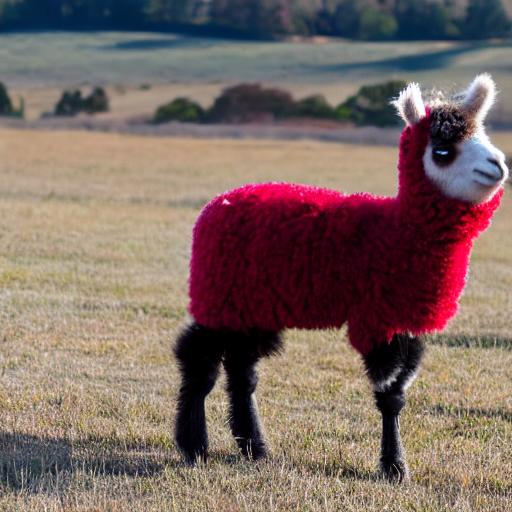

In [18]:
from IPython.display import Image, display

image_path = '/content/llama.jpg'

# Display the image
display(Image(filename=image_path))


The image AI just generated,lets give the AI another prompt.

In [30]:
#let's prompt again

# prompt = "astronaut, riding a horse, on mars, human colony"
# prompt = "children, playing in disneyland, view from a distance"
prompt = """a cute little kitten,
cozy in a home with furniture
"""
print(prompt)
sd_image = get_completion_sd(prompt)
sd_image.save("./new.jpg")

a cute little kitten,
cozy in a home with furniture



  0%|          | 0/50 [00:00<?, ?it/s]

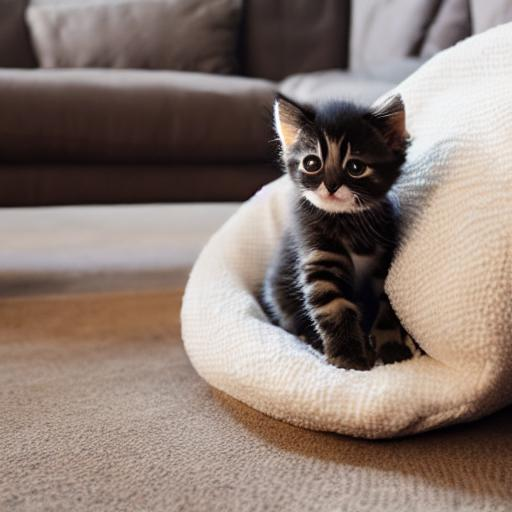

In [31]:
from IPython.display import Image, display

image_path = '/content/new.jpg'

# Display the image
display(Image(filename=image_path))

### Build AI Image Generator

In [32]:
!pip install gradio==3.48.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 12.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=f8ac8d2e87b585922514a572032aa52ab01af54a4df9f218e4b34e665366778

In [33]:
import gradio as gr

In [34]:
def get_completion(prompt):
  negative_prompt = """
  simple background, duplicate, low quality, lowest quality,
  bad anatomy, bad proportions, extra digits, lowres, username,
  artist name, error, duplicate, watermark, signature, text,
  extra digit, fewer digits, worst quality, jpeg artifacts, blurry
  """
  return sd_pipeline(prompt, negative_prompt=negative_prompt).images[0]

# def generate(prompt):
#     output = get_completion_sd(prompt)
#     return output

genai_app = gr.Interface(fn=get_completion,
                         inputs=[gr.Textbox(label="Your prompt")],
                         outputs=[gr.Image(label="Result")],
                         title="Generate Cool Images",
                         description="Generate any image with Stable Diffusion",
                         allow_flagging="never",
                         examples=["astronaut, riding a horse, on mars",
                                   "cargo ship, flying, in space"])
genai_app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://926ab39232b978f22b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
